In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example 1: Diffusion (random transitions) with Rewards in corners

In [28]:
# define the enviornment
n_rows, n_columns = 20, 20

sparse_diffusion_matrix = utils.make_diffision_transition_matrix(n_rows, n_columns, sparse=True)

tiling = utils.define_lattice_tiling(n_rows, n_columns,)

R = np.ones(n_rows * n_columns) * 0
gamma = 0.8
R[0] = 1.0
R[n_columns-1] = 1.0 
R[-1] = 1.0
R[-n_columns] = 1.0

V_0 = utils.draw_random_rewards(n_rows, n_columns, stdev=0.1)
V_a = V_0[:R.shape[0] // 2]
V_b = V_0[R.shape[0] // 2:]

k = 10
V_estimates = np.zeros((R.shape[0], k+1))
V_estimates[tiling, 0] = V_a
V_estimates[~tiling, 0] = V_b


# dynamic programming algorithm
for ii in range(1, k+1):
    V_a =  R[tiling] + gamma * sparse_diffusion_matrix[tiling][:, ~tiling].dot(V_b)
    V_b =  R[~tiling] + gamma * sparse_diffusion_matrix[~tiling][:, tiling].dot(V_a)

    # save reward functions for measurements
    V_estimates[tiling, ii] = V_a
    V_estimates[~tiling, ii] = V_b

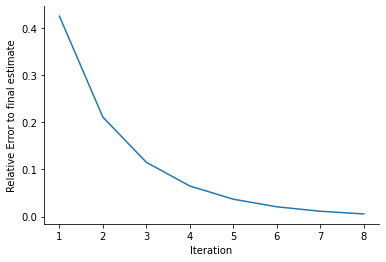

In [29]:
error = np.linalg.norm(V_estimates[:,:k-1] -  np.tile(V_estimates[:, -1].reshape(-1, 1), (1, k-1)), axis=0)
plt.plot(np.arange(1, len(error)), error[1:] / np.max(error))
plt.ylabel('Relative Error to final estimate')
plt.xlabel('Iteration')
sns.despine()

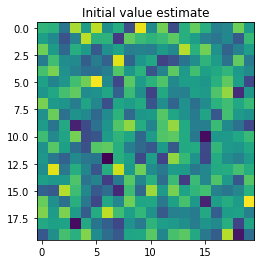

In [35]:
plt.imshow(V_estimates[:,0].reshape(n_rows, n_columns), cmap='viridis')
plt.title('Initial value estimate')
plt.savefig('2dDrift_v0.pdf', dpi=300)

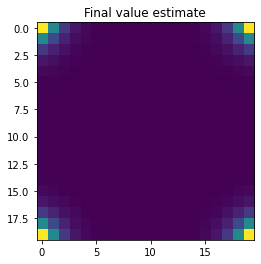

In [36]:
plt.title('Final value estimate')
plt.imshow(V_estimates[:,k-1].reshape(n_rows, n_columns), cmap='viridis', vmin=0, vmax=1)
plt.savefig('2dDrift_vf.pdf', dpi=300)

# Example 2: 1D Diffusion with Reward on one end

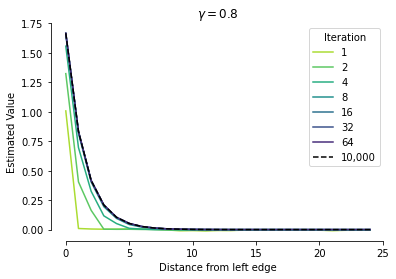

In [39]:
# define the enviornment
n_rows, n_columns = 1, 25

sparse_diffusion_matrix = utils.make_diffision_transition_matrix(n_rows, n_columns, sparse=True)

tiling = utils.define_lattice_tiling(n_rows, n_columns,)

R = np.ones(n_rows * n_columns) * 0
gamma = 0.8
R[0] = 1.0


V_0 = utils.draw_random_rewards(n_rows, n_columns, stdev=0.01)
V_a = V_0[:R.shape[0] // 2]
V_b = V_0[R.shape[0] // 2:]

k = 10000
V_estimates = np.zeros((R.shape[0], k+1))
V_estimates[tiling, 0] = V_a
V_estimates[~tiling, 0] = V_b


# dynamic programming algorithm
for ii in range(1, k+1):
    V_a =  R[tiling] + gamma * sparse_diffusion_matrix[tiling][:, ~tiling].dot(V_b)
    V_b =  R[~tiling] + gamma * sparse_diffusion_matrix[~tiling][:, tiling].dot(V_a)

    # save reward functions for measurements
    V_estimates[tiling, ii] = V_a
    V_estimates[~tiling, ii] = V_b
    
# plot the results
n_steps = 7
cc = sns.color_palette('viridis_r', n_colors=n_steps)
for ii in range(n_steps):
    plt.plot(V_estimates[:, 2**ii], label=f'{2**ii}', c=cc[ii])
plt.plot(V_estimates[:, -1], label=f'10,000', c='k', ls='--')
plt.ylabel('Estimated Value')
plt.xlabel('Distance from left edge')
plt.legend(title='Iteration')
plt.title(r'$\gamma={}$'.format(gamma))
sns.despine(trim=True)
plt.savefig('1dDrift_g8.pdf', dpi=300)

error_g08  = np.linalg.norm(V_estimates[:, 1:-1] - np.tile(V_estimates[:, -1].reshape(-1, 1), (1, k-1)), axis=0)



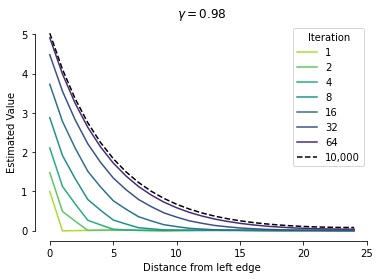

In [38]:
# define the enviornment
n_rows, n_columns = 1, 25

sparse_diffusion_matrix = utils.make_diffision_transition_matrix(n_rows, n_columns, sparse=True)

tiling = utils.define_lattice_tiling(n_rows, n_columns,)

R = np.ones(n_rows * n_columns) * 0
gamma = 0.98
R[0] = 1.0


V_0 = utils.draw_random_rewards(n_rows, n_columns, stdev=0.01)
V_a = V_0[:R.shape[0] // 2]
V_b = V_0[R.shape[0] // 2:]

k = 10000
V_estimates = np.zeros((R.shape[0], k+1))
V_estimates[tiling, 0] = V_a
V_estimates[~tiling, 0] = V_b


# dynamic programming algorithm
for ii in range(1, k+1):
    V_a =  R[tiling] + gamma * sparse_diffusion_matrix[tiling][:, ~tiling].dot(V_b)
    V_b =  R[~tiling] + gamma * sparse_diffusion_matrix[~tiling][:, tiling].dot(V_a)

    # save reward functions for measurements
    V_estimates[tiling, ii] = V_a
    V_estimates[~tiling, ii] = V_b
    
# plot the results
n_steps = 7
cc = sns.color_palette('viridis_r', n_colors=n_steps)
for ii in range(n_steps):
    plt.plot(V_estimates[:, 2**ii], label=f'{2**ii}', c=cc[ii])
plt.plot(V_estimates[:, -1], label=f'10,000', c='k', ls='--')
plt.ylabel('Estimated Value')
plt.xlabel('Distance from left edge')
plt.legend(title='Iteration')
plt.title(r'$\gamma={}$'.format(gamma))
sns.despine(trim=True)

error_g98  = np.linalg.norm(V_estimates[:, 1:-1] - np.tile(V_estimates[:, -1].reshape(-1, 1), (1, k-1)), axis=0)



In [ ]:
# define the enviornment
n_rows, n_columns = 1, 25

sparse_diffusion_matrix = utils.make_diffision_transition_matrix(n_rows, n_columns, sparse=True)

tiling = utils.define_lattice_tiling(n_rows, n_columns,)

R = np.ones(n_rows * n_columns) * 0
gamma = 0.999
R[0] = 1.0


V_0 = utils.draw_random_rewards(n_rows, n_columns, stdev=0.01)
V_a = V_0[:R.shape[0] // 2]
V_b = V_0[R.shape[0] // 2:]

k = 10000
V_estimates = np.zeros((R.shape[0], k+1))
V_estimates[tiling, 0] = V_a
V_estimates[~tiling, 0] = V_b


# dynamic programming algorithm
for ii in range(1, k+1):
    V_a =  R[tiling] + gamma * sparse_diffusion_matrix[tiling][:, ~tiling].dot(V_b)
    V_b =  R[~tiling] + gamma * sparse_diffusion_matrix[~tiling][:, tiling].dot(V_a)

    # save reward functions for measurements
    V_estimates[tiling, ii] = V_a
    V_estimates[~tiling, ii] = V_b
    
# plot the results
n_steps = 7
cc = sns.color_palette('viridis_r', n_colors=n_steps)
for ii in range(n_steps):
    plt.plot(V_estimates[:, 2**ii], label=f'{2**ii}', c=cc[ii])
plt.plot(V_estimates[:, -1], label=f'10,000', c='k', ls='--')
plt.ylabel('Estimated Value')
plt.xlabel('Distance from left edge')
plt.legend(title='Iteration')
plt.title(r'$\gamma={}$'.format(gamma))
sns.despine(trim=True)

error_g99  = np.linalg.norm(V_estimates[:, 1:-1] - np.tile(V_estimates[:, -1].reshape(-1, 1), (1, k-1)), axis=0)




In [ ]:
plt.plot(error_g08/np.max(error_g08), label=r'$\gamma = {}$'.format(0.8))
plt.plot(error_g98/np.max(error_g98), label=r'$\gamma = {}$'.format(0.98))
plt.plot(error_g99/np.max(error_g99), label=r'$\gamma = {}$'.format(0.99))
plt.xscale('log')
plt.legend()
plt.xlabel('Itterations')
plt.ylabel('Relative Error of Value function')
sns.despine(trim=True)
# plt.yscale()